Importing the dependencies

In [35]:
# Importing General libraries for Image processing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image

# Importing Deep learning Libraries
import tensorflow as tf
tf.random.set_seed(2)
from tensorflow import keras
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential

# Importing Dataset
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


# While working on google colab run code below otherwise no need
#from google.colab.patches import cv2_imshow

Loading the Data

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data(path='mnist.npz')

In [3]:
type(xtrain)

numpy.ndarray

In [4]:
# Checking the shape of numpy arrays

print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 images with dimensions of 28 x 28 pixels

Testing data = 10000 images with dimensions of 28 x 28 pixels

In [5]:
# Printing an Image from the dataset

print(xtrain[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

In [6]:
print(xtrain[100].shape)

(28, 28)


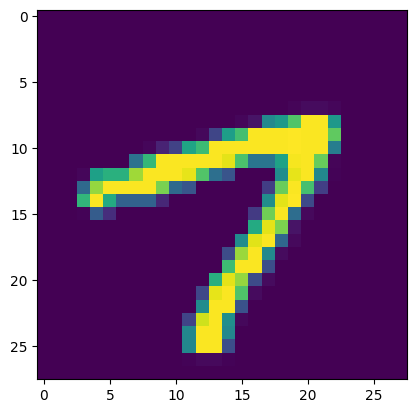

This Image shows digit  7


In [7]:
# Printing the Image

plt.imshow(xtrain[101])
plt.show()

# Printing the label of this Image

print('This Image shows digit ', ytrain[101])

In [8]:
# Printing unique labels in Ytrain and ytest

print(np.unique(ytrain))
print(np.unique(ytest))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
# Scaling images to same dimensions

xtrain = xtrain / 255
xtest = xtest / 255


Building the Neural Network

In [10]:
# Making the Model

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(units=64, activation='relu'),
    Dense(units=100, activation='relu'),
    Dropout(0.2),
    Dense(units=50, activation='relu'),
    Dense(units=10, activation='sigmoid')
])

# Compiling the Model

model.compile(loss= keras.losses.SparseCategoricalCrossentropy(),
              optimizer= keras.optimizers.Adam(0.001),
              metrics= ['accuracy'])

In [11]:
# Training the Neural Network

model.fit(xtrain, ytrain,
          epochs= 15)

Epoch 1/15
1875/1875 [==============================] - 12s 4ms/step - loss: 0.3403 - accuracy: 0.8965
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1719 - accuracy: 0.9481
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1352 - accuracy: 0.9586
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1184 - accuracy: 0.9636
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1070 - accuracy: 0.9673
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0952 - accuracy: 0.9696
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0910 - accuracy: 0.9721
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0868 - accuracy: 0.9730
Epoch 9/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0786 - accuracy: 0.9760
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.07

Training Data Accuracy is:

Model Evaluation

In [12]:
loss, accuracy = model.evaluate(xtest, ytest)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0739 - accuracy: 0.9816
0.9815999865531921


313/313 [==============================] - 1s 2ms/step


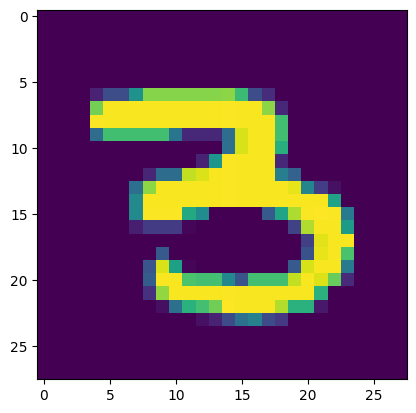

True label for this data point is:  3
Predicted label for this data point is:  [6.9113248e-06 6.1910939e-01 8.0811310e-01 1.0000000e+00 1.4130602e-07
 8.2861477e-01 1.0567342e-08 2.2480917e-01 1.4956252e-01 9.2132241e-02]


In [13]:
ypred = model.predict(xtest)

# checking a random data point

plt.imshow(xtest[51])
plt.show()

print("True label for this data point is: ", ytest[51])
print("Predicted label for this data point is: ", ypred[51])

Model.predict() gives the prediction probability of each class for that data point

In [14]:
# Converting prediction probabilities to class labels

label_for_selected_image = np.argmax(ypred[51])
print(label_for_selected_image)

3


In [15]:
# Converting the prediction probability to class label for all data points

ypred_labels = [np.argmax(i) for i in ypred]
print(ypred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

ytest = True Labels

ypred_labels = Predicted labels

Building a Confusion Matrix

Text(0.5, 25.722222222222214, 'Predicted labels')

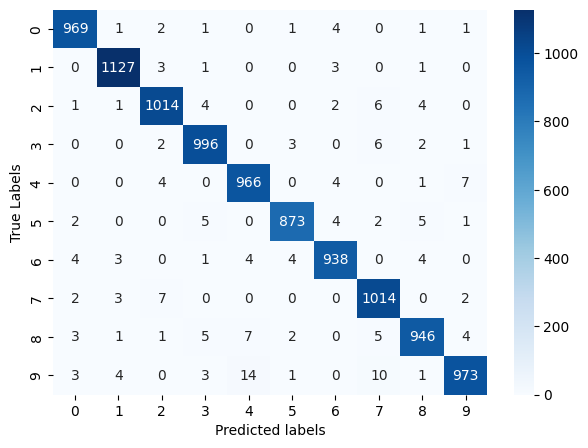

In [16]:
matrix = confusion_matrix(ytest, ypred_labels)
plt.figure(figsize=(7,5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
#plt.yticks(rotation=30)
plt.xlabel('Predicted labels')

Building a Predictive system

In [17]:
input_image_path = 'MNIST_digit.png'

In [18]:
input_image = cv2.imread(input_image_path)

In [19]:
print(input_image.shape)

(318, 318, 3)


Since Image have RGB Channels, we have to convert it to Greyscale image

In [20]:
greyscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
greyscale.shape

(318, 318)

In [21]:
input_image_resize = cv2.resize(greyscale, (28,28))
input_image_resize.shape

(28, 28)

In [41]:
cv2.imshow(' ', input_image_resize)

In [24]:
input_image_resize = input_image_resize / 255

In [25]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

# Here (1, 28, 28) tells about 1 image of 28, 28 shape

In [26]:
image_prediction = model.predict(image_reshaped)
print(np.argmax(image_prediction))

1/1 [==============================] - 0s 329ms/step
3


**Predictive System**

1/1 [==============================] - 0s 40ms/step


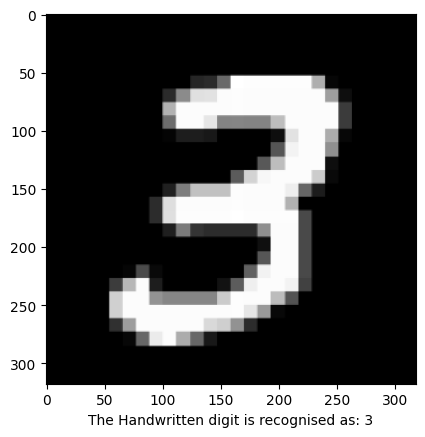

In [47]:
input_image_path = input("Enter path of the image to be predicted: \n")

input_image = cv2.imread(input_image_path)
cv2.imshow(' ', input_image)


greyscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

input_image_resize = cv2.resize(greyscale, (28,28))

input_image_resize = input_image_resize / 255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

image_prediction = model.predict(image_reshaped)

plt.imshow(input_image)
plt.xlabel('The Handwritten digit is recognised as: {}'.format(np.argmax(image_prediction)));
#print('The Handwritten digit is recognised as: ', np.argmax(image_prediction))